

# Project: Investigating a Medical Appointment Dataset

## Table of Contents
<ul>
<li><a>Introduction</a></li>
<li><a>Data Wrangling</a></li>
<li><a>Exploratory Data Analysis</a></li>
<li><a>Conclusions</a></li>
</ul>

<a></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row, such as:

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


<a></a>
## Data Wrangling

&gt; In this section of the report, I will load the Medical Appointment dataset reading a csv file, check for cleanliness, and analyze some statistics values using the given variables to justify my cleaning decisions and questions below.

### General Properties

In [3]:
# reading Medical Appointment Dataset
df = pd.read_csv('dataset/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0.0,0.0,No


In [4]:
# Investigating number of rows and columns
df.shape

(86328, 14)

In [5]:
# investigating statistics values in the dataset, such as mean, min, max, count 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,8.632800e+04,8.632800e+04,86328.000000,86328.000000,86328.000000,86328.000000,86328.000000,86327.000000,86327.000000
mean,1.473685e+14,5.658643e+06,37.019310,0.098103,0.196333,0.071101,0.029735,0.022218,0.290071
std,2.560971e+14,6.563029e+04,23.102883,0.297455,0.397225,0.256995,0.169857,0.160702,0.453798
min,9.377953e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.196774e+12,5.631746e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.161595e+13,5.667090e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.446672e+13,5.702700e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790452e+06,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [6]:
# Investigating missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86328 entries, 0 to 86327
Data columns (total 14 columns):
PatientId         86328 non-null float64
AppointmentID     86328 non-null int64
Gender            86328 non-null object
ScheduledDay      86328 non-null object
AppointmentDay    86328 non-null object
Age               86328 non-null int64
Neighbourhood     86328 non-null object
Scholarship       86328 non-null int64
Hipertension      86328 non-null int64
Diabetes          86328 non-null int64
Alcoholism        86328 non-null int64
Handcap           86327 non-null float64
SMS_received      86327 non-null float64
No-show           86327 non-null object
dtypes: float64(3), int64(6), object(5)
memory usage: 9.2+ MB


In [7]:
# Investigating Null values in 'No-show' column
df[df['No-show'].isnull()]   

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
86327,1.383618e+12,5702047,F,2016-05-16T11:22:02Z,2016-06-08T00:00:00Z,65,MÁRIO CYPRESTE,0,0,0,0,NaN,NaN,NaN


In [8]:
# Investigating Null values in 'SMS_received' column
df[df['SMS_received'].isnull()]   

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
86327,1.383618e+12,5702047,F,2016-05-16T11:22:02Z,2016-06-08T00:00:00Z,65,MÁRIO CYPRESTE,0,0,0,0,NaN,NaN,NaN


In [9]:
# Investigating Null values in 'Handcap' column
df[df['Handcap'].isnull()]   

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
86327,1.383618e+12,5702047,F,2016-05-16T11:22:02Z,2016-06-08T00:00:00Z,65,MÁRIO CYPRESTE,0,0,0,0,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00400930b8>,
      dtype=object)

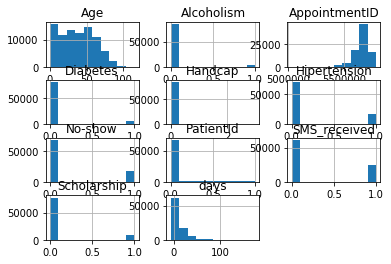

In [83]:
df.hist()

### Data Cleaning 

&gt; **Conclusion**: I've realised this dataset is quite cleaned as there are only 2 queries to perform and 1 column to considerate:
&gt;
&gt;● 1 null row - in this case we will delete the specific row
&gt;
&gt;● replace 'no-show' values - in this case we will replace the specific values to 0 and 1 in order to obtain statistics values as this column is a dependent variable
&gt;
&gt;● add 'days' column - days between Appointment and Scheduled Day


In [11]:
# Deleting Null rows
df.dropna(subset = ['No-show'], inplace=True)
df


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0.0,0.0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0.0,0.0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0.0,0.0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0.0,0.0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0.0,0.0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0.0,0.0,No


In [12]:
# Updating 'No-show' rows due to obtain statistics histograms and data analysis
df['No-show'].replace(['No','Yes'],[0,1],inplace=True)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0.0,0.0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0.0,0.0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0.0,0.0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0.0,0.0,0
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0.0,0.0,0
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0.0,0.0,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0.0,0.0,1
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0.0,0.0,0
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0.0,0.0,0


In [13]:
from datetime import datetime
date_formatymd = "%Y-%m-%dT"

df['days'] = (pd.to_datetime(df['AppointmentDay'], format=date_formatymd) - pd.to_datetime(df['ScheduledDay'], format=date_formatymd)).dt.days
df
#df['daysformat'] = df['days'].dt.days
#print(df['daysformat'])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0.0,0.0,0,-1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0.0,0.0,0,-1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0.0,0.0,0,-1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,0,-1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0.0,0.0,0,-1
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0.0,0.0,0,1
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0.0,0.0,1,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0.0,0.0,1,1
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0.0,0.0,0,-1
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0.0,0.0,0,1


In [91]:
df.groupby(['days'])['PatientId'].count()

days
-7          1
-2          4
-1      30236
 0       4171
 1       4715
 2       2113
 3       3943
 4       2719
 5       3590
 6       4022
 7       1761
 8       1254
 9       1282
 10       987
 11       947
 12      1234
 13      2251
 14      1183
 15       872
 16       785
 17       713
 18       735
 19       909
 20      1373
 21       874
 22       593
 23       530
 24       554
 25       564
 26       731
        ...  
 92         2
 93         2
 94         5
 95         3
 96         2
 97         4
 100        1
 101        4
 102        3
 103        8
 104        4
 106        1
 107        5
 108        5
 109        1
 110        2
 111        5
 114        2
 118        3
 121        2
 124        1
 125        1
 126        1
 132       11
 141        6
 150        1
 154       10
 161       11
 168        8
 175        1
Name: PatientId, Length: 125, dtype: int64

<a></a>
## Exploratory Data Analysis

&gt; **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - Exploring the independent variables and correlation to the dependent variable

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

Noshow = df['No-show'] == 1
Show = df['No-show'] == 0


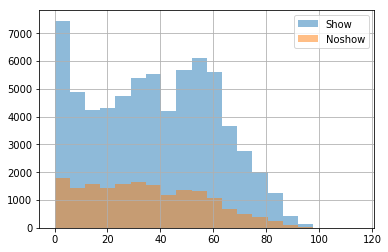

In [15]:
df.Age[Show].hist(alpha=0.5, bins=20, label='Show')
df.Age[Noshow].hist(alpha=0.5, bins=20, label='Noshow')

plt.legend()

SMS_received
0.0    0.175636
1.0    0.281698
Name: No-show, dtype: float64

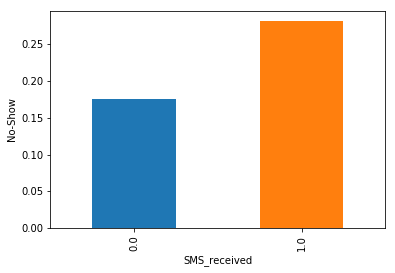

In [53]:
df.groupby('SMS_received')['No-show'].mean().plot(kind='bar').set_ylabel('No-Show')
df.groupby('SMS_received')['No-show'].mean()

Hipertension
0    0.213425
1    0.177651
Name: No-show, dtype: float64

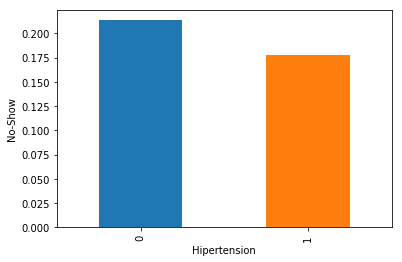

In [52]:
df.groupby('Hipertension')['No-show'].mean().plot(kind='bar').set_ylabel('No-Show')
df.groupby('Hipertension')['No-show'].mean()

Diabetes
0    0.208034
1    0.185077
Name: No-show, dtype: float64

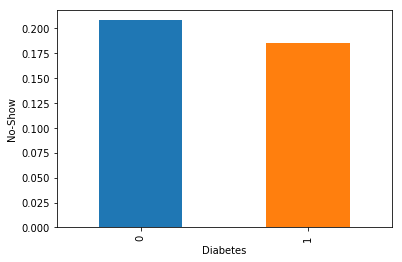

In [51]:
df.groupby('Diabetes')['No-show'].mean().plot(kind='bar').set_ylabel('No-Show')
df.groupby('Diabetes')['No-show'].mean()

Scholarship
0    0.202227
1    0.244775
Name: No-show, dtype: float64

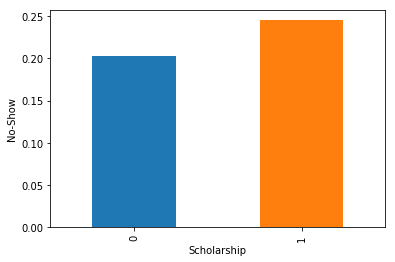

In [50]:
df.groupby('Scholarship')['No-show'].mean().plot(kind='bar').set_ylabel('No-Show')
df.groupby('Scholarship')['No-show'].mean()

Handcap
0.0    0.206761
1.0    0.184442
2.0    0.231293
3.0    0.300000
Name: No-show, dtype: float64

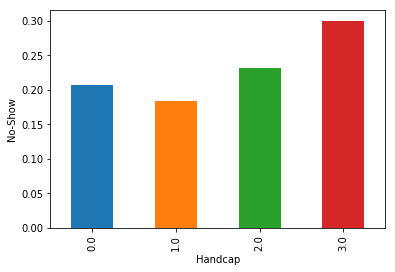

In [49]:
df.groupby('Handcap')['No-show'].mean().plot(kind='bar').set_ylabel('No-Show')
df.groupby('Handcap')['No-show'].mean()

Gender
F    56043
M    30284
Name: PatientId, dtype: int64

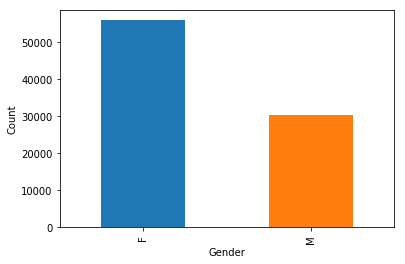

In [32]:
df.groupby(['Gender'])['PatientId'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['Gender'])['PatientId'].count()

Gender
F    38.839016
M    33.650872
Name: Age, dtype: float64

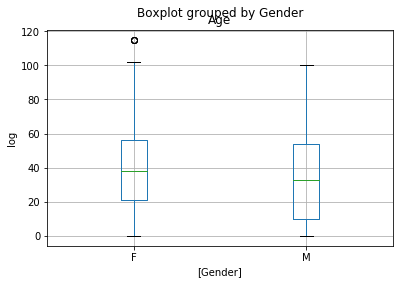

In [45]:
df.boxplot(column=['Age'], by = ['Gender']).set_ylabel('log')
df.groupby('Gender')['Age'].mean()

No-show
Gender Alcoholism          
F      0           0.207862
       1           0.257609
M      0           0.203827
       1           0.173649

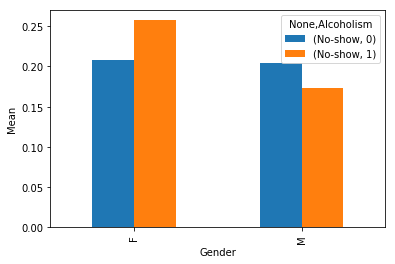

In [54]:
df.groupby(['Gender','Alcoholism'])[['No-show']].mean().unstack().plot(kind='bar').set_ylabel('Mean')
df.groupby(['Gender','Alcoholism'])[['No-show']].mean()

,Age
count,86327.000000
mean,37.018986
std,23.102821
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


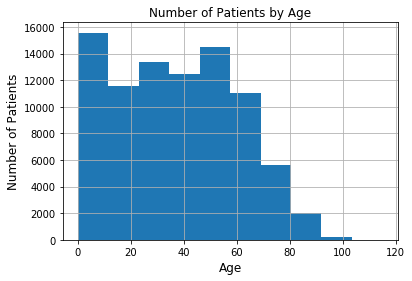

In [80]:
ax = df['Age'].hist()
ax.set_ylabel('Number of Patients', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_title('Number of Patients by Age', fontsize=12)
pd.DataFrame(df['Age'].describe())

,days
count,86327.000000
mean,9.110209
std,15.166036
min,-7.000000
25%,-1.000000
50%,3.000000
75%,13.000000
max,175.000000


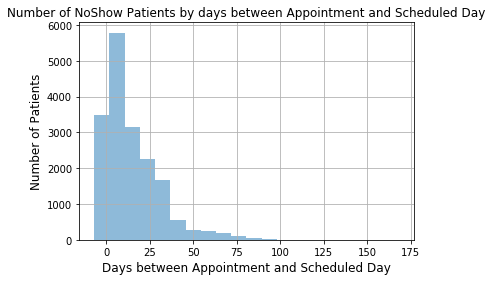

In [82]:
# Count of Patients X days between Appointment Day and Scheduled Day
#df.days[Show].hist(alpha=0.5, bins=20, label='Show')
ax = df.days[Noshow].hist(alpha=0.5, bins=20, label='Noshow')

ax.set_ylabel('Number of Patients', fontsize=12)
ax.set_xlabel('Days between Appointment and Scheduled Day', fontsize=12)
ax.set_title('Number of NoShow Patients by days between Appointment and Scheduled Day', fontsize=12)
pd.DataFrame(df['days'].describe())

#plt.legend()

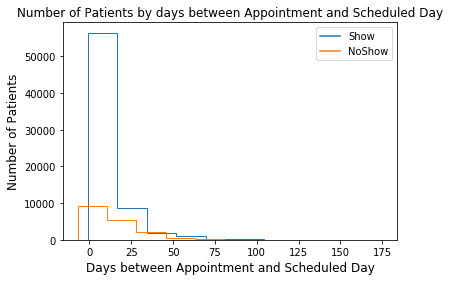

In [79]:
from matplotlib.lines import Line2D

fig = plt.figure()
ax = fig.add_subplot(111)

#df.days[Show].hist(alpha=0.5, bins=20, label='Show')
#df.days[Noshow].hist(alpha=0.5, bins=20, label='Noshow')

ax.hist(df.days[Show], label='Show', histtype='step')
ax.hist(df.days[Noshow], label='NoShow', histtype='step')
ax.set_ylabel('Number of Patients', fontsize=12)
ax.set_xlabel('Days between Appointment and Scheduled Day', fontsize=12)
ax.set_title('Number of Patients by days between Appointment and Scheduled Day', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels)
plt.show()

<h5></h5><h5>Conclusion:</h5>

<p> 28% of patients who received SMS did not attend the appointment</p>
<p> 17% of hypertensive patients did not attend the appointment</p>
<p> 18% of diabetic patients did not attend the appointment</p>
<p> 24% of patients who received the Bolsa Familia benefit did not attend the appointment</p>
<p> 30% of patients with a level 3 problem did not attend the appointment</p>
<p>
</p><p>65% of amount is Female Gender</p>
<p>35% of amount is Male Gender</p>
&gt;
&gt;25% of Female Gender that NoShow is Alcoholic
&gt;
&gt;17% of Male Gender that NoShow is Alcoholic
&gt;
<p>Accordingly to the data dictionary:</p>
&gt;AppointmentDay = The day of the actual appointment, when they have to visit the doctor. 
&gt;
&gt;ScheduledDay = The day someone called or registered the appointment, this is before appointment of course.

&gt;Based on that info:
&gt;- the No show mean of days between Appointment and Scheduled Day is about 9.
&gt;- 50% of Patients that no Show in the appointment is 3 days.

### Research Question 2 - Which neighbourhood has the highest no-show rate?

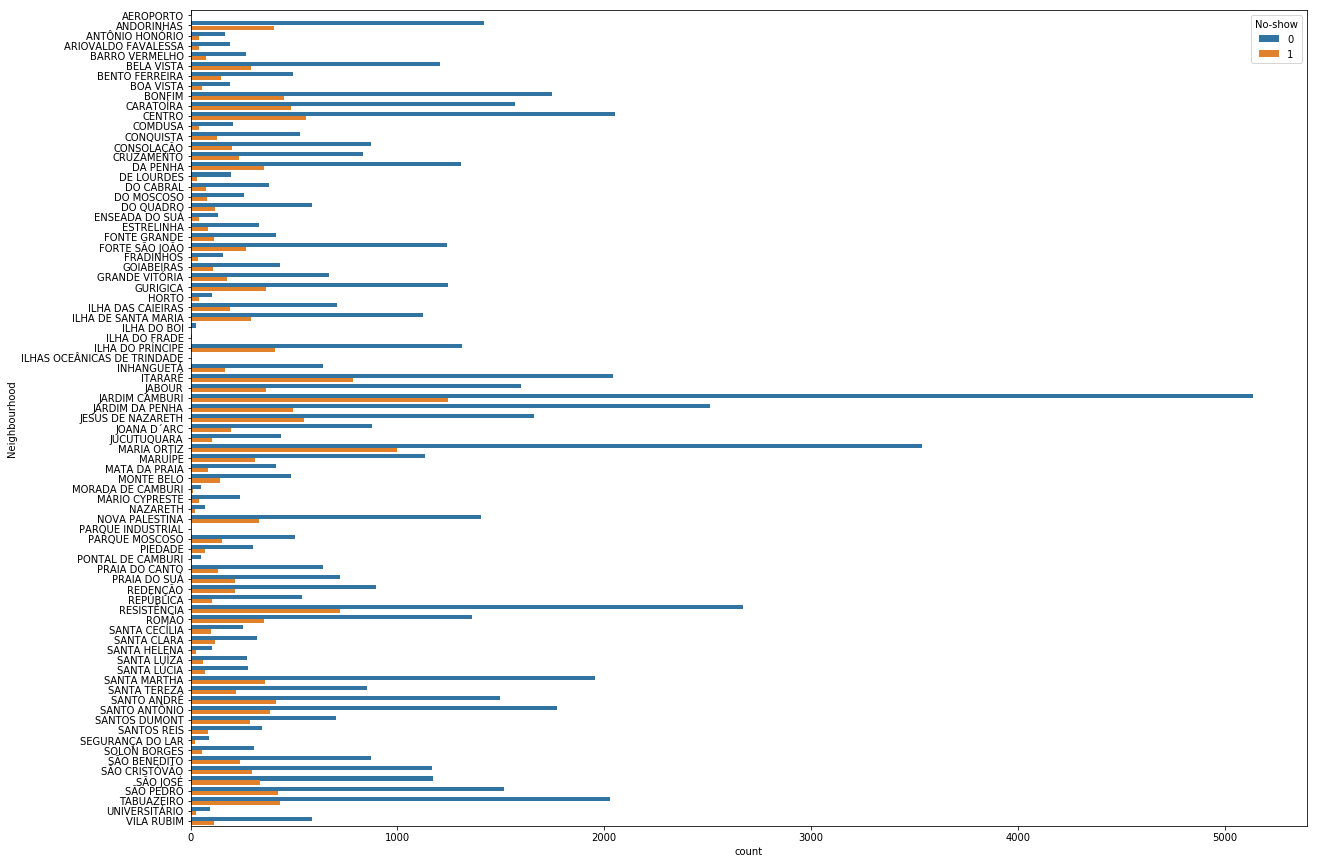

In [63]:
# Neighbourhood Data Analysis

dfNeigh = df.groupby(['Neighbourhood','No-show']).size().reset_index(name='count').sort_values(by =['Neighbourhood'], ascending=True)
dfNeigh

plt.figure(figsize=(20,15))
plt = sns.barplot(x='count',y='Neighbourhood', hue = 'No-show', data=dfNeigh)


<h5></h5><h5>Conclusion:</h5>

<p> The neighbourhoods "Maria Ortiz" and "Jardim Camburi" have the highest rate of non-attendance, but it's proportional to the number of scheduled appointment</p>


<a></a>
## Final Conclusions


Considering that the total of 86328 samples, where approximately 30241 has negative days between date of appointment and scheduled, I consider that 35% of the total of samples may be compromised.

Based on the exploratory Data Analysis, we obtained some important findings:
- most appointments are female (65%)
- a considerable part of the female gender who has an alcoholism report did not attend the appointment (25%)
- a considerable slice that did not attend the appointment had the appointment date very close to the appointment date (50%)

We can consider that some findings were important but not sufficient due to the compromise of the base. It will be necessary to assess the cause of the negative days for better data accuracy.
